## Pymaceuticals Student Analysis 

In [47]:
%matplotlib inline

In [48]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st 
import numpy as np 
from pathlib import Path 

In [49]:
# Load CSV files
mouse_metadata_csv = Path("Resources/Mouse_metadata.csv")
study_results_csv = Path("Resources/Study_results.csv")

In [50]:
# Read metadata and results data files and store them in DataFrames 
mouse_metadata = pd.read_csv(mouse_metadata_csv)
study_results = pd.read_csv(study_results_csv)

In [51]:
# Combine data files into a single dataset 
complete_study_data = pd.merge(study_results, mouse_metadata, how="left", on=["Mouse ID", "Mouse ID"])
complete_study_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [52]:
# Find number of unique mice 
mice_count = complete_study_data["Mouse ID"].nunique()
mice_count

249

In [53]:
# Find duplicate mice by ID number that shoes up for Mouse ID and Timepoint 
duplicate_id = complete_study_data[complete_study_data[["Mouse ID", "Timepoint"]].duplicated(keep=False) == True] 
duplicate_id["Mouse ID"].unique()

array(['g989'], dtype=object)

In [54]:
# Optional: get all data for the duplicate Mouse ID 
duplicate_data = complete_study_data.loc[complete_study_data["Mouse ID"] == "g989"]
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [55]:
# Create clean DataFrame by dropping the duplicate mouse by its ID
complete_study_data.rename(columns={"Mouse ID": "Mouse_ID"},inplace=True)
clean_study_data = complete_study_data[complete_study_data.Mouse_ID != "g989"]
clean_study_data.head()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [56]:
# Check number of mice in clean DataFrame
clean_study_data["Mouse_ID"].nunique()

248

## Summary Statistics 

In [57]:
# Calculate mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen 
mean_tumor_vol = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
median_tumor_vol = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].median()
variance_tumor_vol = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].var()
std_dev_tumor_vol = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].std()
std_err_tumor_vol = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Combine stats calculations into single DataFrame
stats_summary_table = {"Mean Tumor Volume": mean_tumor_vol, 
                       "Median Tumor Volume": median_tumor_vol, 
                       "Tumor Volume Variance": variance_tumor_vol, 
                       "Tumor Volume Std. Dev.": std_dev_tumor_vol, 
                       "Tumor Volume Std. Err.": std_err_tumor_vol}

stats_summary_table_df = pd.DataFrame(stats_summary_table)

# Display the DataFame
stats_summary_table_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [58]:
# do aggregate method? OPTIONAL
# mean_tumor_vol = clean_study_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean() ["Tumor Volume (mm3)"].median() ["Tumor Volume (mm3)"].var() ["Tumor Volume (mm3)"].std() ["Tumor Volume (mm3)"].sem()

## Bar and Pie Charts

In [59]:
# Generate a bar plot showing total number of rows (Mouse ID/Timepoint) for each drug regimen using Pandas
drug_timepoints = clean_study_data.groupby(["Drug Regimen"])["Timepoint"].count()
drug_timepoints = drug_timepoints.sort_values(ascending=False)
drug_timepoints_df = pd.DataFrame(drug_timepoints)
drug_timepoints_df

,Timepoint
Drug Regimen,
Capomulin,230
Ramicane,228
Ketapril,188
Naftisol,186
Zoniferol,182
Stelasyn,181
Placebo,181
Infubinol,178
Ceftamin,178


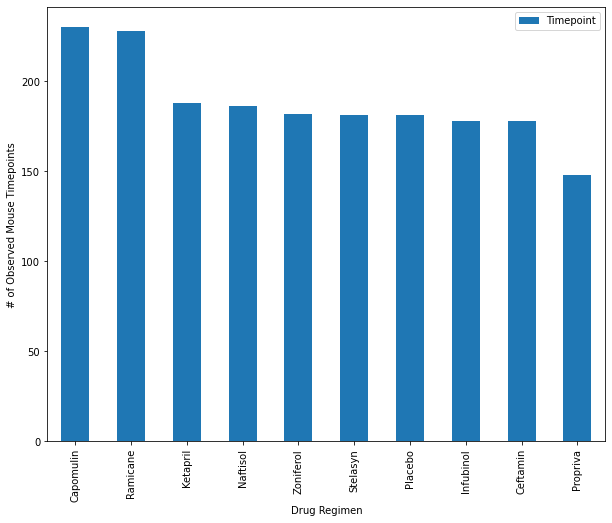

<Figure size 432x288 with 0 Axes>

In [60]:
drug_chart = drug_timepoints_df.plot(kind="bar", figsize=(10,8))
drug_chart.set_xlabel("Drug Regimen")
drug_chart.set_ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()

In [61]:
drug_timepoints_reset = drug_timepoints_df.reset_index()
drug_timepoints_reset

,Drug Regimen,Timepoint
0,Capomulin,230
1,Ramicane,228
2,Ketapril,188
3,Naftisol,186
4,Zoniferol,182
5,Stelasyn,181
6,Placebo,181
7,Infubinol,178
8,Ceftamin,178
9,Propriva,148


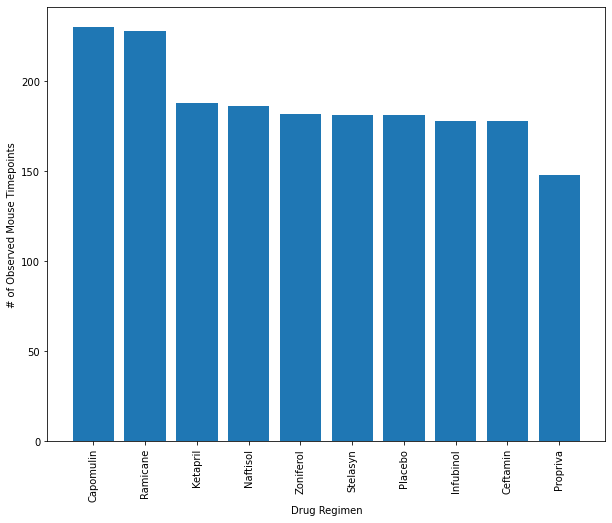

In [62]:
# Generate a bar plot showing total number of rows (Mouse ID/Timepoint) for each drug regimen using pyplot
x_axis = np.arange(len(drug_timepoints_reset))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(10,8))
plt.bar(x_axis, drug_timepoints_reset["Timepoint"], align="center")
plt.xticks(tick_locations, drug_timepoints_reset["Drug Regimen"], rotation="vertical")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

In [63]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mice_gender = clean_study_data.groupby(["Sex"])["Sex"].count()
mice_gender_df = pd.DataFrame(mice_gender)
mice_gender_df

,Sex
Sex,
Female,922
Male,958


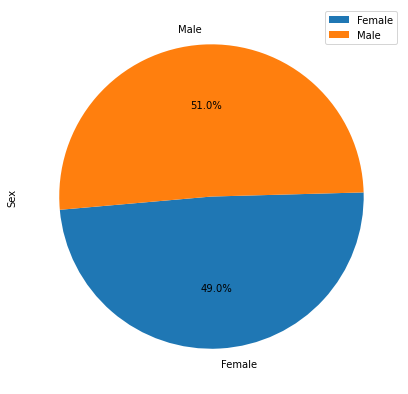

In [64]:
gender_pie1 = mice_gender_df.plot.pie(y="Sex", startangle=185, autopct="%1.1f%%", figsize=(7,7))
plt.show()

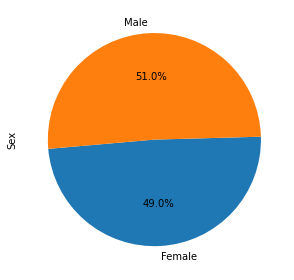

In [65]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_pie2 = mice_gender_df["Sex"]
gender_labels = ["Female", "Male"]
plt.pie(gender_pie2, labels=gender_labels, startangle=185, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.tight_layout()
plt.show()

## Quartiles, Outlers, and Boxplots 

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_study_data.groupby(["Mouse_ID"])["Timepoint"].max()
last_timepoint_df = pd.DataFrame(last_timepoint)

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df= pd.merge(clean_study_data, last_timepoint_df, how="right", on=["Mouse_ID", "Timepoint"])
max_timepoint_df

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,f932,0,45.000000,0,Ketapril,Male,15,29
1,x336,0,45.000000,0,Naftisol,Female,4,29
2,h428,0,45.000000,0,Ketapril,Female,1,27
3,v199,0,45.000000,0,Naftisol,Female,17,29
4,o848,0,45.000000,0,Stelasyn,Female,14,27
...,...,...,...,...,...,...,...,...
243,r944,45,41.581521,2,Capomulin,Male,12,25
244,u364,45,31.023923,3,Capomulin,Male,18,17
245,p438,45,61.433892,1,Ceftamin,Female,11,26
246,x773,45,58.634971,4,Placebo,Female,21,30


In [67]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_cap = []
tumor_vol_ram = []
tumor_vol_inf = []
tumor_vol_cef = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in max_timepoint_df.iterrows():
    if row["Drug Regimen"] == 'Capomulin':
        tumor_vol_cap.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[1]:
        tumor_vol_ram.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[2]:
        tumor_vol_inf.append(row['Tumor Volume (mm3)'])
    if row["Drug Regimen"] == treatments[3]:
        tumor_vol_cef.append(row['Tumor Volume (mm3)'])
    
    # add subset 
drug_df = pd.DataFrame({"Capomulin": tumor_vol_cap,
                       treatments[1]: tumor_vol_ram,
                       treatments[2]: tumor_vol_inf,
                       treatments[3]: tumor_vol_cef
                       })
    
    # Determine outliers using upper and lower bounds
# drug_df_max = drug_df.max()
# drug_df_min = drug_df.min()
# drug_df2 = pd.merge(drug_df_min, drug_df_max)
drug_df

,Capomulin,Ramicane,Infubinol,Ceftamin
0,39.952347,43.166373,36.321346,45.000000
1,46.539206,44.183451,46.250112,45.000000
2,30.485985,43.419381,47.010364,45.000000
3,38.753265,38.342008,45.699331,45.000000
4,38.982878,36.561652,51.542431,47.784682
5,34.455298,31.095335,54.048608,46.784535
6,41.483008,38.407618,50.005138,48.722078
7,37.074024,45.220869,55.650681,52.925348
8,32.377357,36.374510,60.969711,56.057749
9,40.159220,30.276232,54.656549,55.742829


In [68]:
# Calculate potential outliers for Capomulin
quartile_cap = drug_df[treatments[0]].quantile([0.25, 0.5, 0.75])
lowerq_cap = quartile_cap[0.25]
med_cap = quartile_cap[0.5]
upperq_cap = quartile_cap[0.75]
iqr_cap = upperq_cap-lowerq_cap

print(f"The lower quartile of Capomulin is: {lowerq_cap}")
print(f"The upper quartile of Capomulin is: {upperq_cap}")
print(f"The interquartile range of Capomulin is: {iqr_cap}")
print(f"The median of Capomulin is: {med_cap} ")

lowerb_cap = lowerq_cap - (1.5*iqr_cap)
upperb_cap = upperq_cap + (1.5*iqr_cap)
print(f"Values below {lowerb_cap} could be outliers.")
print(f"Values above {upperb_cap} could be outliers.")


The lower quartile of Capomulin is: 32.37735684
The upper quartile of Capomulin is: 40.1592203
The interquartile range of Capomulin is: 7.781863460000004
The median of Capomulin is: 38.125164399999996 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [69]:
# Calculate potential outliers for Ramicane
quartile_ram = drug_df[treatments[1]].quantile([0.25, 0.5, 0.75])
lowerq_ram = quartile_ram[0.25]
med_ram = quartile_ram[0.5]
upperq_ram = quartile_ram[0.75]
iqr_ram = upperq_ram-lowerq_ram

print(f"The lower quartile of Ramicane is: {lowerq_ram}")
print(f"The upper quartile of Ramicane is: {upperq_ram}")
print(f"The interquartile range of Ramicane is: {iqr_ram}")
print(f"The median of Ramicane is: {med_ram} ")

lowerb_ram = lowerq_ram - (1.5*iqr_ram)
upperb_ram = upperq_ram + (1.5*iqr_ram)
print(f"Values below {lowerb_ram} could be outliers.")
print(f"Values above {upperb_ram} could be outliers.")

The lower quartile of Ramicane is: 31.56046955
The upper quartile of Ramicane is: 40.65900627
The interquartile range of Ramicane is: 9.098536719999998
The median of Ramicane is: 36.56165229 
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.


In [70]:
# Calculate potential outliers for Infubinol
quartile_inf = drug_df[treatments[2]].quantile([0.25, 0.5, 0.75])
lowerq_inf = quartile_inf[0.25]
med_inf = quartile_inf[0.5]
upperq_inf = quartile_inf[0.75]
iqr_inf = upperq_inf-lowerq_inf

print(f"The lower quartile of Infubinol is: {lowerq_inf}")
print(f"The upper quartile of Infubinol is: {upperq_inf}")
print(f"The interquartile range of Infubinol is: {iqr_inf}")
print(f"The median of Infubinol is: {med_inf} ")

lowerb_inf = lowerq_inf - (1.5*iqr_inf)
upperb_inf = upperq_inf + (1.5*iqr_inf)
print(f"Values below {lowerb_inf} could be outliers.")
print(f"Values above {upperb_inf} could be outliers.")

The lower quartile of Infubinol is: 54.04860769
The upper quartile of Infubinol is: 65.52574285
The interquartile range of Infubinol is: 11.477135160000003
The median of Infubinol is: 60.16518046 
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.


In [71]:
# Calculate potential outliers for Ceftamin
quartile_cef = drug_df[treatments[3]].quantile([0.25, 0.5, 0.75])
lowerq_cef = quartile_cef[0.25]
med_cef = quartile_cef[0.5]
upperq_cef = quartile_cef[0.75]
iqr_cef = upperq_cef-lowerq_cef

print(f"The lower quartile of Ceftamin is: {lowerq_cef}")
print(f"The upper quartile of Ceftamin is: {upperq_cef}")
print(f"The interquartile range of Ceftamin is: {iqr_cef}")
print(f"The median of Ceftamin is: {med_cef} ")

lowerb_cef = lowerq_cef - (1.5*iqr_cef)
upperb_cef = upperq_cef + (1.5*iqr_cef)
print(f"Values below {lowerb_cef} could be outliers.")
print(f"Values above {upperb_cef} could be outliers.")

The lower quartile of Ceftamin is: 48.72207785
The upper quartile of Ceftamin is: 64.29983003
The interquartile range of Ceftamin is: 15.577752179999997
The median of Ceftamin is: 59.85195552 
Values below 25.355449580000002 could be outliers.
Values above 87.66645829999999 could be outliers.


In [72]:
# Summarize potential outliers 
outliers_summary_df = pd.DataFrame({"Drug": treatments, 
                                    "Lower Quartile": [lowerq_cap, lowerq_ram, lowerq_inf, lowerq_cef],
                                    "Upper Quartile": [upperq_cap, upperq_ram, upperq_inf, upperq_cef], 
                                    "IQR": [iqr_cap, iqr_ram, iqr_inf, iqr_cef],
                                    "Median": [med_cap, med_ram, med_inf, med_cef],
                                    "Lower Bound": [lowerb_cap, lowerb_ram, lowerb_inf, lowerb_cef], 
                                    "Upper Bound": [upperb_cap, upperb_ram, upperb_inf, upperb_cef]})

outliers_summary_df

,Drug,Lower Quartile,Upper Quartile,IQR,Median,Lower Bound,Upper Bound
0,Capomulin,32.377357,40.159220,7.781863,38.125164,20.704562,51.832015
1,Ramicane,31.560470,40.659006,9.098537,36.561652,17.912664,54.306811
2,Infubinol,54.048608,65.525743,11.477135,60.165180,36.832905,82.741446
3,Ceftamin,48.722078,64.299830,15.577752,59.851956,25.355450,87.666458


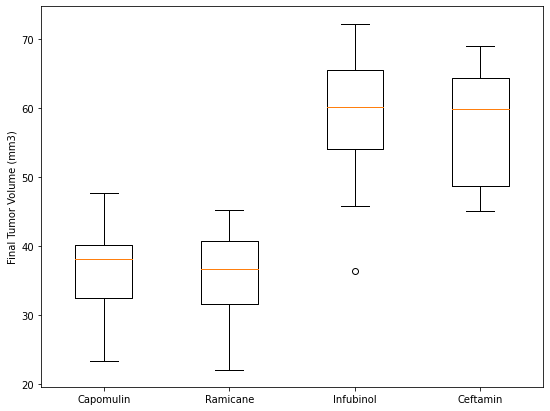

In [73]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
drugs_boxplot = [drug_df[treatments[0]],
                 drug_df[treatments[1]],
                 drug_df[treatments[2]],
                 drug_df[treatments[3]]]

fig1, ax = plt.subplots(figsize=(9,7))
ax.set_ylabel("Final Tumor Volume (mm3)")
ax.boxplot(drugs_boxplot, 0)
plt.xticks([1,2,3,4], treatments)
plt.show()

## Line and Scatter Plots

In [74]:
# Grab list of mice treated with Capomulin
capomulin_mouse = clean_study_data.loc[clean_study_data["Drug Regimen"] == "Capomulin"]
capomulin_mouse

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
226,j246,0,45.000000,0,Capomulin,Female,21,21
227,r554,0,45.000000,0,Capomulin,Female,8,17
228,s185,0,45.000000,0,Capomulin,Female,3,17
229,b742,0,45.000000,0,Capomulin,Male,7,21
...,...,...,...,...,...,...,...,...
1854,s710,45,40.728578,1,Capomulin,Female,1,23
1859,j119,45,38.125164,1,Capomulin,Female,7,23
1878,i557,45,47.685963,1,Capomulin,Female,1,24
1888,r944,45,41.581521,2,Capomulin,Male,12,25


In [75]:
# Grab randon ID of a mouse treated with Capomulin 
capomulin_mouse.sample()

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
300,s710,5,43.180977,0,Capomulin,Female,1,23


In [76]:
# Create DataFrame for Mouse_ID "v923" 
mouse_v923_df = clean_study_data.loc[clean_study_data["Mouse_ID"] == "v923"]
mouse_v923_df

,Mouse_ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
236,v923,0,45.000000,0,Capomulin,Female,19,21
339,v923,5,45.704434,0,Capomulin,Female,19,21
520,v923,10,39.848223,0,Capomulin,Female,19,21
913,v923,15,40.457989,0,Capomulin,Female,19,21
1025,v923,20,39.648296,0,Capomulin,Female,19,21
1232,v923,25,40.156413,1,Capomulin,Female,19,21
1300,v923,30,40.752216,2,Capomulin,Female,19,21
1616,v923,35,41.439242,2,Capomulin,Female,19,21
1683,v923,40,42.151015,2,Capomulin,Female,19,21
1821,v923,45,40.658124,2,Capomulin,Female,19,21


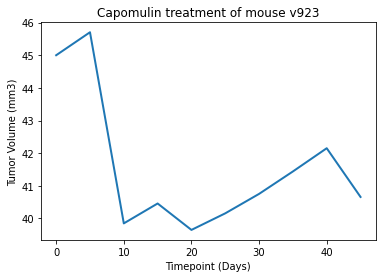

In [77]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
v923_timepoint = mouse_v923_df["Timepoint"]
v923_tum_vol = mouse_v923_df["Tumor Volume (mm3)"]

plt.title("Capomulin treatment of mouse v923")
plt.plot(v923_timepoint, v923_tum_vol, linewidth=2, markersize=12)
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()

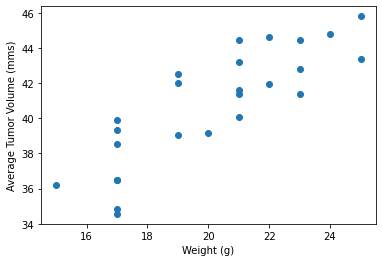

In [82]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_weight_df = clean_study_data.loc[clean_study_data["Drug Regimen"] == "Capomulin"]
avg_tum_col = cap_weight_df.groupby(["Mouse_ID"]).mean()

plt.scatter(avg_tum_col["Weight (g)"], avg_tum_col["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mms)")

plt.show()